In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import utils
import models

### Util functions

In [2]:
def plot_images(batch, nb_imgs):
    plt.figure(figsize=(20, 4))
    for i in range(nb_imgs):
        ax = plt.subplot(2, nb_imgs, i + 1)
        plt.imshow(batch[i].squeeze())
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

def plot_results(mean_loss, batch_data, nb_imgs=10):
    (x, y, y_hat) = batch_data
    print(f'Mean loss: {round(mean_loss, 4)}')
    print('Input')
    plot_images(x, nb_imgs)
    print('Target')
    plot_images(y, nb_imgs)
    print('Generated')
    plot_images(y_hat, nb_imgs)

# LFW

In [3]:
(lfw_train, lfw_eval, lfw_test) = utils.load_dataset('lfw', batch_size=32)

  0%|          | 0/18983 [00:00<?, ?it/s]

Mean loss: 0.0018
Input


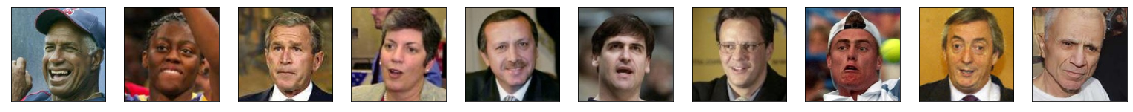

Target


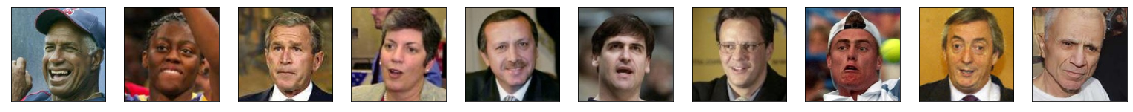

Generated


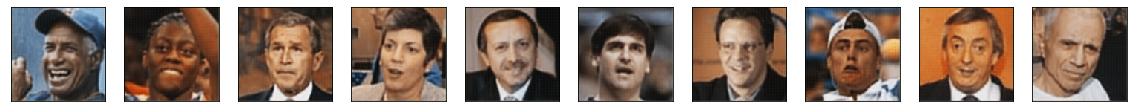

In [4]:
conv_autoencoder = models.ConvAutoencoder((128, 128, 3))
conv_autoencoder.load_weights('trained_models/conv_autoencoder_d_lfw_b_32_e_20')
plot_results(*conv_autoencoder.evaluate(lfw_test))

Mean loss: 0.0005
Input


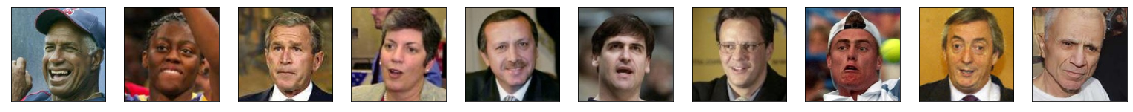

Target


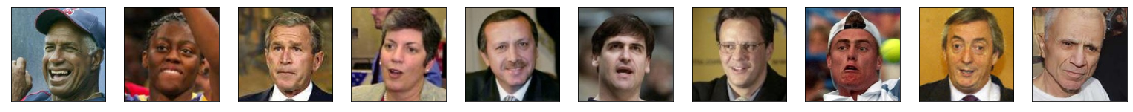

Generated


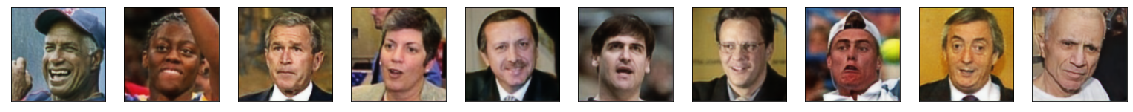

In [5]:
u_net = models.UNet((128, 128, 3))
u_net.load_weights('trained_models/u_net_d_lfw_b_32_e_10')
plot_results(*u_net.evaluate(lfw_test))

# Blurry LFW

In [6]:
(blurry_lfw_train, blurry_lfw_eval, blurry_lfw_test) = utils.load_dataset('blurry_lfw', batch_size=32)

  0%|          | 0/18983 [00:00<?, ?it/s]

Mean loss: 0.0026
Input


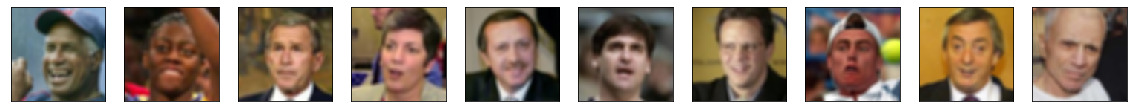

Target


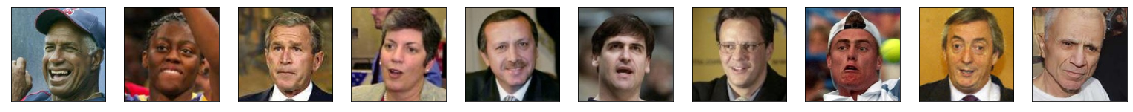

Generated


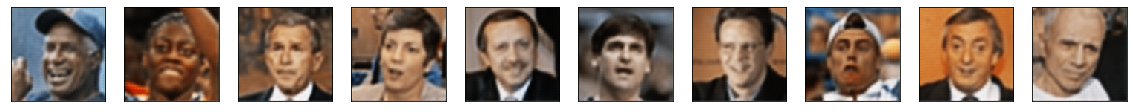

In [7]:
conv_autoencoder = models.ConvAutoencoder((128, 128, 3))
conv_autoencoder.load_weights('trained_models/conv_autoencoder_d_blurry_lfw_b_32_e_20')
plot_results(*conv_autoencoder.evaluate(blurry_lfw_test))

Mean loss: 0.0018
Input


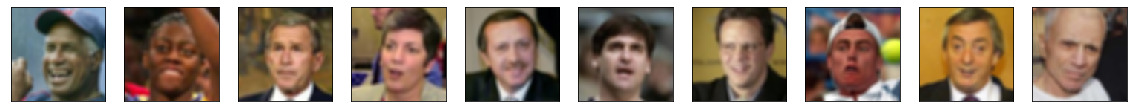

Target


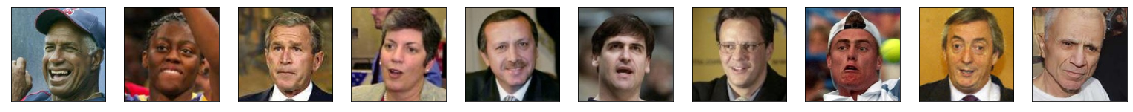

Generated


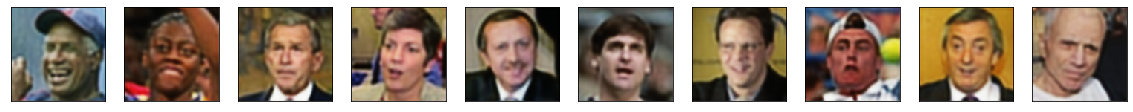

In [8]:
u_net = models.UNet((128, 128, 3))
u_net.load_weights('trained_models/u_net_d_blurry_lfw_b_32_e_10')
plot_results(*u_net.evaluate(blurry_lfw_test))